In [1]:
# from animaldataset.dataset import get_data_loaders
import torch
from torchvision import models
from PIL import Image
from matplotlib.pyplot import imshow
from torchvision import models, transforms

/home/mvv/anaconda3/envs/ml/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [67]:
model = models.convnext_tiny()

In [68]:
import matplotlib.pyplot as plt

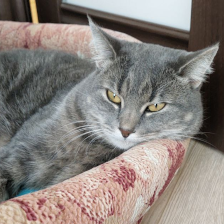

In [69]:
image = Image.open("cat.png")
image = image.convert()
(image)

In [70]:
input = transforms.PILToTensor()(image)
input = input.to(dtype=torch.float)

In [125]:
from torchcam.methods import GradCAM
from torchcam.utils import overlay_mask
from torchvision.transforms.functional import normalize, resize, to_pil_image

In [127]:
cam = GradCAM(model, model.features[7][2].block[0])

In [128]:
# with torch.no_grad(): 
    out = model(input.unsqueeze(0))

IndentationError: unexpected indent (301231380.py, line 2)

In [ ]:
cam(out.squeeze(0).argmax().item(), out)

[tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6358, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.1948, 0.0000, 0.0000, 1.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3240, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2112]]])]

In [ ]:
activation_map = cam(out.squeeze(0).argmax().item(), out)
result = overlay_mask(to_pil_image(input), to_pil_image(activation_map[0].squeeze(0), mode='F'), alpha=0.5)
# Display it
plt.imshow(result); plt.tight_layout(); plt.savefig("./pictures/cat.png"); plt.show()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.